# Perdiction of sales

### Problem Statement
This dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

---------------------

### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

We have covered how to prepare a dataset and the process of feature engineering two weeks ago. In addition, we have already created Lasso and Ridge regressions on Monday. Today, we will be working with the ensemble methods. 

-------------------------
### Model Building: Ensemble Models

Try out the different ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)
- **Note:** Spend some time on the documention for each of these models.
- **Note:** As you spend time on this challenge, it is suggested to review how each of these models work and how they compare to each other.

Calculate the **mean squared error** on the test set. Explore how different parameters of the model affect the results and the performance of the model. (*Stretch: Create a visualization to display this information*)

- Use GridSearchCV to find optimal paramaters of models.
- Compare agains the Lasso and Ridge Regression models from Monday.

**Questions to answer:**
- Which ensemble model performed the best? 

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv(r'..\..\..\Unit_3\Day_3\data_preparation_exercise-master\regression_exercise_cleaned_transformed.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Years_of_Operation,Item_Fat_Content_Low Fat,Item_Fat_Content_NA,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Broad_Item_Type_DR,Broad_Item_Type_FD,Broad_Item_Type_NC
0,9.30,0.016047,249.8092,9,1999-01-01,2,3735.1380,23.0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,3,2009-01-01,2,443.4228,13.0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,9,1999-01-01,2,2097.2700,23.0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,0,1998-01-01,1,732.3800,24.0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,1,1987-01-01,3,994.7052,35.0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [20]:
from datetime import datetime

data['Outlet_Establishment_Year'] = pd.DatetimeIndex(data['Outlet_Establishment_Year']).year
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Years_of_Operation,Item_Fat_Content_Low Fat,Item_Fat_Content_NA,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Broad_Item_Type_DR,Broad_Item_Type_FD,Broad_Item_Type_NC
0,9.30,0.016047,249.8092,9,1999,2,3735.1380,23.0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,3,2009,2,443.4228,13.0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,9,1999,2,2097.2700,23.0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,0,1998,1,732.3800,24.0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,1,1987,3,994.7052,35.0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [21]:
X = pd.concat((data.iloc[:,0:6],data.iloc[:,7:]),axis=1).to_numpy()
y = data.iloc[:,6].to_numpy()
print(X.shape)
print(y.shape)

(8523, 36)
(8523,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
# X = pd.concat((data.iloc[:,0:6],data.iloc[:,7:]),axis=1)
# y = data.iloc[:,6]
# print(X.shape)
# print(y.shape)

In [24]:
# from sklearn.model_selection import train_test_split

# train_ratio = .8

# df_train, df_test = train_test_split(data, shuffle=True, train_size=train_ratio)

# # print(f'{len(X_train)} training samples and {len(X_test)} test samples')
# df_train

In [25]:
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler


# # This step has to be done after the train test split since the scaling calculations are based on the training dataset

# scaler = MinMaxScaler()
# scaler.fit(df_train)
# scaled_data = scaler.transform(df_train)
# scaled_data

## Random Forest Regressor

In [26]:
parameter_candidates = [
  {'n_estimators': [180,185,190,195], 
  # 'criterion': ['squared_error', 'absolute_error']
  'max_depth': [5,6,7],
  # 'min_samples_split': [2,3],
  # 'min_samples_leaf': [1,2],
  # 'min_weight_fraction_leaf': [0,0.5,0.75],
  'max_features': ['sqrt', 'log2', 'auto'],
  # # 'max_leaf_nodes': [],
  # # 'min_impurity_decrease':[],
  # # 'bootstrap': [True,False],
  # # 'oob_score': [True,False],
  # # 'n_jobs': [],
  # # 'verbose': [],
  # # 'ccp_alpha': [],
  # # 'max_samples': []
  },
]

In [27]:
# creating random forest regressor
RF = RandomForestRegressor(random_state=0)

# Create a gridsearch object with the regressor and parameter candidates
gridsearch_RF = GridSearchCV(estimator=RF, param_grid=parameter_candidates, n_jobs=-1)

# Train the gridsearch on data's feature and target data
gridsearch_RF.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [5, 6, 7],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [180, 185, 190, 195]}])

In [28]:
# identify the best model

best_RF = gridsearch_RF.best_estimator_
best_RF

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=180,
                      random_state=0)

In [29]:
# make predictions on the test set
preds = best_RF.predict(X_test)

In [30]:
preds

array([ 684.79728753, 1391.32289611, 2719.6078867 , ..., 3025.31154584,
        684.79728753, 1666.13510482])

In [31]:
#get root mean squared error

rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

1074.5174754206942

In [32]:
# Check performance on train and test set

y_train_pred_RF =  best_RF.predict(X_train)
y_test_pred_RF =  best_RF.predict(X_test)

r2_train = r2_score(y_train, y_train_pred_RF)
r2_test = r2_score(y_test, y_test_pred_RF)

print(f'Train R^2:\t{r2_train}\nTest R^2:\t{r2_test}')

Train R^2:	0.6099075203803873
Test R^2:	0.6030842460475685


## Gradient Boosting

In [35]:
GBF_parameter_candidates = [
  {#'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
  # 'learning_rate': [0.001,0.01,0.1,0,1,10,100],
  'n_estimators': [100,150,200,250],
  # 'subsample': [0.5,1.0],
  # 'criterion': ['friedman_mse', 'squared_error', 'mse'],
  'max_depth': [3,4,5,6,7],
  # # 'min_samples_split': [2,3],
  # # 'min_samples_leaf': [1,2],
  # # 'min_weight_fraction_leaf': [0,0.5,0.75],
  'max_features': ['sqrt', 'log2', 'auto'],
  # 'alpha': [0.7,0.8,0.9,1.0],
  # # 'max_leaf_nodes': [],
  # # 'min_impurity_decrease':[],
  # # 'bootstrap': [True,False],
  # # 'oob_score': [True,False],
  # # 'n_jobs': [],
  # # 'verbose': [],
  # # 'ccp_alpha': [],
  # # 'max_samples': []
  },
]

In [36]:
# creating gradient boosting regressor
GBF = GradientBoostingRegressor(random_state=0)

# Create a gridsearch object with the regressor and parameter candidates
GBF_gridsearch = GridSearchCV(estimator=GBF, param_grid=GBF_parameter_candidates, n_jobs=-1)

# Train the gridsearch on data's feature and target data
GBF_gridsearch.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [3, 4, 5, 6, 7],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [100, 150, 200, 250]}])

In [37]:
# identify the best model

best_GBF = GBF_gridsearch.best_estimator_
best_GBF

GradientBoostingRegressor(max_features='auto', random_state=0)

In [38]:
# make predictions on the test set

GBF_preds = best_GBF.predict(X_test)

In [39]:
#get root mean squared error

rmse = np.sqrt(mean_squared_error(y_test, GBF_preds))
rmse

1069.0335318042917

In [40]:
# Check performance on train and test set

y_train_pred_GBF =  best_GBF.predict(X_train)
y_test_pred_GBF =  best_GBF.predict(X_test)

r2_train = r2_score(y_train, y_train_pred_GBF)
r2_test = r2_score(y_test, y_test_pred_GBF)

print(f'Train R^2:\t{r2_train}\nTest R^2:\t{r2_test}')

Train R^2:	0.6370002336864089
Test R^2:	0.6071253328011912


## XGBoost

In [41]:
xg_parameter_candidates = [
  {'learning_rate':[0,0.1,0.2],
  'max_depth': [4,5,6],
  # 'subsample': [0.5,1.0],
  'colsample_bytree':[0.1,0.3,0.5],
  'n_estimators': [100,150],
  'alpha': [0,5,10,15],
  # 'gamma': [0,1,2],
  # 'lambda': [0,1,2]
  },
]

In [42]:
# creating gradient boosting regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Create a gridsearch object with the regressor and parameter candidates
xg_gridsearch = GridSearchCV(estimator=xg_reg, param_grid=xg_parameter_candidates, n_jobs=-1)

# Train the gridsearch on data's feature and target data
xg_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid=[{'alpha': [0, 5, 10, 15],
                          'colsample_bytree': [0.1, 0.3, 0.5],
                          'learning_rate': [0, 0.1, 0.2],
                          'max_depth': [4, 5, 6], 'n_estimators': [100, 150]}])

In [43]:
# identify the best model

best_xg = xg_gridsearch.best_estimator_
best_xg

XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=15, ...)

In [44]:
# convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [45]:
# make predictions on the test set

xg_preds = best_xg.predict(X_test)

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, xg_preds))
rmse

1072.2892209657114

In [47]:
# Check performance on train and test set

y_train_pred_xg =  best_xg.predict(X_train)
y_test_pred_xg =  best_xg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred_xg)
r2_test = r2_score(y_test, y_test_pred_xg)

print(f'Train R^2:\t{r2_train}\nTest R^2:\t{r2_test}')

Train R^2:	0.6493723839409262
Test R^2:	0.6047287279389217


In [48]:
params = {"alpha":5, "base_score":0.5, "booster":'gbtree', "callbacks":None,
             "colsample_bylevel":1, "colsample_bynode":1, "colsample_bytree":0.5,
             "early_stopping_rounds":None, "enable_categorical":False,
             "eval_metric":None, "gamma":0, "gpu_id":-1, "grow_policy":'depthwise',
             "importance_type":None, "interaction_constraints":'',
             "learning_rate":0.1, "max_bin":256, "max_cat_to_onehot":4,
             "max_delta_step":0, "max_depth":5, "max_leaves":0, "min_child_weight":1,
             "missing":'nan', "monotone_constraints":'()', "n_estimators":150, "n_jobs":0,
             "num_parallel_tree":1, "predictor":'auto', "random_state":0, "reg_alpha":5}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:10:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:10:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:10:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner

In [49]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2574.970940,20.123800,2575.527073,43.846521
1,2392.362912,19.387642,2395.284706,55.972878
2,2233.098768,33.416850,2238.084404,69.228563
3,2105.025878,35.970325,2110.669226,71.251462
4,1967.059474,39.991523,1975.337498,87.192613


In [50]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1090.107203
Name: test-rmse-mean, dtype: float64


In [51]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:10:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "enable_categorical", "missing", "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




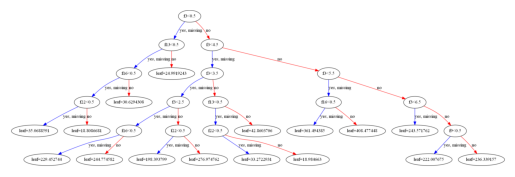

In [52]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

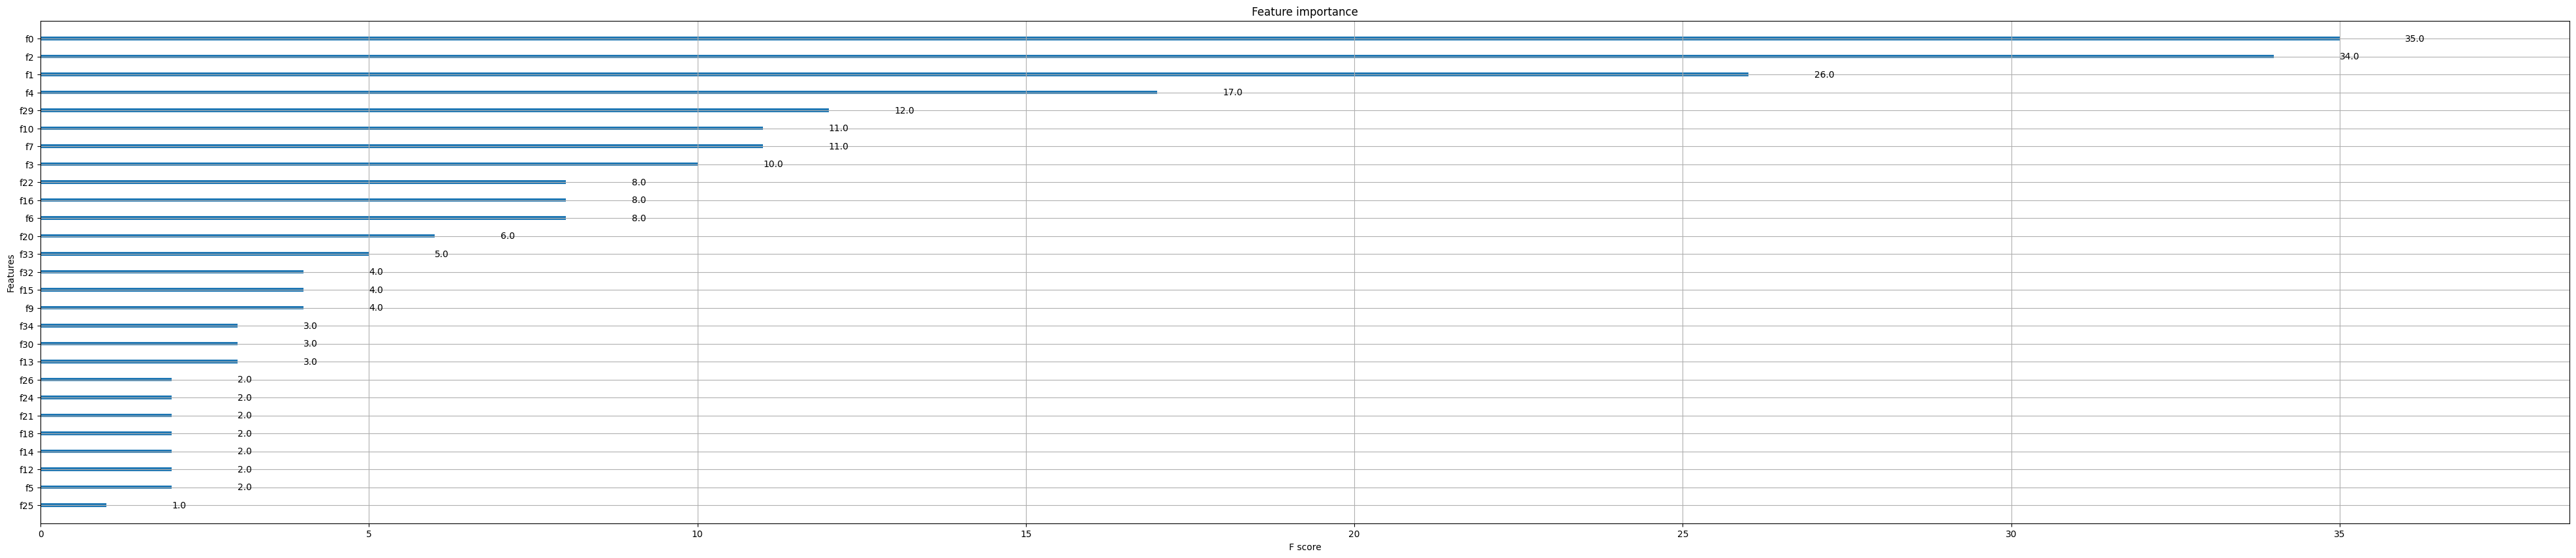

In [53]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Comparison of Results

1. Gradient Boosting
    - R^2 = 0.6071253328011912
    - RMSE = 1069.0335318042917
2. XGBoost
    - R^2 = 0.6047287279389217
    - RMSE = 1072.2892209657114
3. Random Forest
    - R^2 = 0.6030842460475685
    - RMSE = 1074.5174754206942
4. Lasso
    - R^2 = 0.5722578863393357
5. Ridge
    - R^2 = 0.5709640622777961
6. LR
    - R^2 = 0.5603853555237754